In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
from sklearn.model_selection import train_test_split

SEQ_LEN = 50
INPUT_SIZE = 4 * 25  # 25 landmarks X 4 features each - x,y,z,vis


# remove head landmarks - part of learning and feature selection
head = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
str_head = [str(h) for h in head]


def read_raw_data(score_path, data_path):
    shot_names = {}

    score_df = pd.read_csv(score_path)
    score_df = score_df[score_df['frames'] < SEQ_LEN]

    data_df = pd.read_csv(data_path)
    amount_of_shots = len(score_df)
    print('all examples:', amount_of_shots)

    single_shot_x = np.zeros((SEQ_LEN, INPUT_SIZE))
    x = np.zeros((amount_of_shots, SEQ_LEN, INPUT_SIZE))
    y = []
    shot_index = 0

    for _, row in tqdm(score_df.iterrows()):

        frames = row['frames']
        score = row['score']
        shot_name = row['name']

        for i in range(0, frames):
            frame_name = shot_name + '_{}'.format(i)
            shot_data = []
            for k, v in data_df[data_df['name'] == frame_name].iteritems():
                if k == 'name':
                    continue
                shot_data.append(v.values[0])
            single_shot_x[i] = np.array(shot_data)

        if shot_index == amount_of_shots:
            break

        # todo: binary y
        y.append(score)
        x[shot_index] = np.nan_to_num(single_shot_x)
        shot_names[shot_index] = shot_name
        shot_index += 1

    return x, np.array(y), shot_names


x, y, names = read_raw_data(score_path='labels/fts_score.csv', data_path='labels/fts_data.csv')


all examples: 1371


0it [00:00, ?it/s]

x shape (1371, 50, 100)
y shape (1371,)


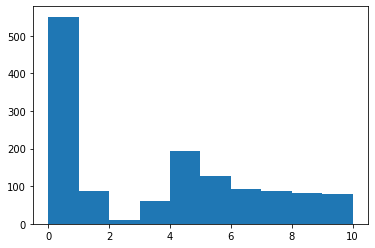

In [2]:
print('x shape', x.shape)
print('y shape', y.shape)

import matplotlib.pyplot as plt
plt.hist(y)
plt.show()